In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Preprocesamiento de Datos

## Calidad de Aire

In [2]:
calidad_aire = pd.read_csv('CalidadAire.csv')

In [3]:
calidad_aire.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
calidad_aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


Información de los Datos:

<ol>
    <li>Date (DD/MM/YYYY)</li>
    <li>Time (HH.MM.SS)</li>
    <li>True hourly averaged concentration CO in mg/m^3 (reference analyzer)</li>
    <li>PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)</li>
    <li>True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)</li>
    <li>True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)</li>
    <li>PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)</li>
    <li>True hourly averaged NOx concentration in ppb (reference analyzer)</li>
    <li>PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)</li>
    <li>True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)</li>
    <li>PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)</li>
    <li>PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)</li>
    <li>Temperature in Â°C</li>
    <li>Relative Humidity (%)</li>
    <li>AH Absolute Humidity</li>
</ol>


En primera instancia se puede notar que las últimas 2 columnas no tienen ningún dato por lo que se deben de eliminar. Ahora se procederá con la eliminación de datos nulos.

In [5]:
calidad_aire_preprocesado = calidad_aire.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [6]:
del calidad_aire

In [7]:
calidad_aire_preprocesado.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [8]:
calidad_aire_preprocesado.dropna(inplace=True)

In [9]:
calidad_aire_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [10]:
(calidad_aire_preprocesado == 0).any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                 True
RH               False
AH               False
dtype: bool

La única característica con valores de 0 es la de temperatura (T), pero en este caso es un valor permitido y no fuera de lo común.

In [55]:
calidad_aire_preprocesado.describe(include='all')

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7344,7344,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000,7344.000000
unique,347,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2/22/2005,20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.129711,1110.580746,10.275735,250.625432,826.920071,113.874082,1444.752723,1043.512936,17.770425,49.060076,0.989453
std,NaN,NaN,1.436472,218.681331,7.441068,202.818370,256.648430,46.153867,350.344170,405.569613,8.862688,17.451563,0.399889
min,NaN,NaN,0.100000,647.000000,0.200000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,NaN,NaN,1.100000,946.000000,4.600000,107.000000,649.000000,81.000000,1203.000000,744.750000,11.200000,35.400000,0.698100
50%,NaN,NaN,1.800000,1075.000000,8.500000,198.000000,795.000000,113.000000,1447.000000,990.000000,16.900000,49.300000,0.959700
75%,NaN,NaN,2.800000,1246.000000,14.300000,320.000000,960.000000,139.000000,1673.000000,1305.000000,23.800000,62.500000,1.258600


Se puede ver que todas las columnas tienen un valor mínimo de -200, y el hecho de que estas unidades no deberían ser negativas en ningún caso, se podría asumir que es un error del sensor o un código nulo, se debe examinar cómo se propaga este valor en el set de datos. Se calcula la cantidad de instancias en la que esto ocurre por cada columna

In [13]:
for column in calidad_aire_preprocesado.columns:
    print(f'{column}: {calidad_aire_preprocesado.loc[calidad_aire_preprocesado[column] == -200, column].count()}')

Date: 0
Time: 0
CO(GT): 1683
PT08.S1(CO): 366
NMHC(GT): 8443
C6H6(GT): 366
PT08.S2(NMHC): 366
NOx(GT): 1639
PT08.S3(NOx): 366
NO2(GT): 1642
PT08.S4(NO2): 366
PT08.S5(O3): 366
T: 366
RH: 366
AH: 366


En primer lugar se nota que la columna "NMHC(GT)" tiene una gran cantidad de instancias con este valor, por lo que es un feature que no va a generar gran utilidad para el modelo. 

En segundo lugar, se puede ver que el target feature "CO(GT)" tiene 1683 instancias con este valor, lo cual indica que se deben eliminar estas ya que no van a servir porque se necesitan esos datos para analizar el desempeño del modelo.

En tercer lugar, se nota que hay 9 features con 366 instancias que contienen este valor, esto indica que probablemente sean las mismas instancias a las que se refieren, por lo que habría que eliminarlas ya que son instancias con muy pocos datos, y no representan gran tamaño con respecto a todo el set de datos. Pero para no "suponer" que las 366 intancias son todas las mismas, se procede a probar esto posterior a eliminar las intancias que no contienen valor para el target feature, porque es posible que entre ellas estén las 366 de que no tienen valor para las demás columnas

In [14]:
calidad_aire_preprocesado.drop("NMHC(GT)", axis=1,inplace=True)

In [30]:
condition = calidad_aire_preprocesado[['CO(GT)']].eq(null_code).all(axis=1)

In [31]:
calidad_aire_preprocesado = calidad_aire_preprocesado[~condition]
del condition

In [15]:
null_code = -200

null_masks = {}
for col in ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']:
    null_masks[col] = calidad_aire_preprocesado[col] == null_code

all_same = all(null_masks[list(null_masks.keys())[0]].equals(mask) 
               for mask in null_masks.values())

print(f"Las columnas comparten la misma fila con el valor -200: {all_same}")

Las columnas comparten la misma fila con el valor -200: True


In [16]:
condition = calidad_aire_preprocesado[['PT08.S2(NMHC)']].eq(null_code).all(axis=1)

In [17]:
calidad_aire_preprocesado = calidad_aire_preprocesado[~condition]
del condition

In [45]:
for column in calidad_aire_preprocesado.columns:
    print(f'{column}: {calidad_aire_preprocesado.loc[calidad_aire_preprocesado[column] == -200, column].count()}')

Date: 0
Time: 0
CO(GT): 0
PT08.S1(CO): 0
C6H6(GT): 0
PT08.S2(NMHC): 0
NOx(GT): 0
PT08.S3(NOx): 0
NO2(GT): 0
PT08.S4(NO2): 0
PT08.S5(O3): 0
T: 0
RH: 0
AH: 0


Ahora únicamente las columnas "NOx(GT)" y "NO2(GT)" tienen ese valor de -200 en 403 y 400 instancias, respectivamente. Como esta cantidad representa alrededor de un 5% de la cantidad de datos, se puede imputar el valor de la media en para esos casos sin arriesgar un sesgo significante en los datos.

In [41]:
mean_nox = calidad_aire_preprocesado.loc[calidad_aire_preprocesado['NOx(GT)'] != -200, 'NOx(GT)'].mean()
mean_no2 = calidad_aire_preprocesado.loc[calidad_aire_preprocesado['NO2(GT)'] != -200, 'NO2(GT)'].mean()

In [43]:
calidad_aire_preprocesado.loc[:, 'NOx(GT)'] = calidad_aire_preprocesado['NOx(GT)'].replace(-200, mean_nox)
calidad_aire_preprocesado.loc[:, 'NO2(GT)'] = calidad_aire_preprocesado['NO2(GT)'].replace(-200, mean_no2)

/var/folders/tq/mb390y9j4rggkdnpr7vpvhhr0000gn/T/ipykernel_45741/4108417746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calidad_aire_preprocesado['NOx(GT)'] = calidad_aire_preprocesado['NOx(GT)'].replace(-200, mean_nox)
/var/folders/tq/mb390y9j4rggkdnpr7vpvhhr0000gn/T/ipykernel_45741/4108417746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calidad_aire_preprocesado['NO2(GT)'] = calidad_aire_preprocesado['NO2(GT)'].replace(-200, mean_no2)


Ahora se procede a visualizar la distribución de los datos numéricos del conjunto de datos.

In [52]:
calidad_aire_num = calidad_aire_preprocesado.select_dtypes(include=[np.number])

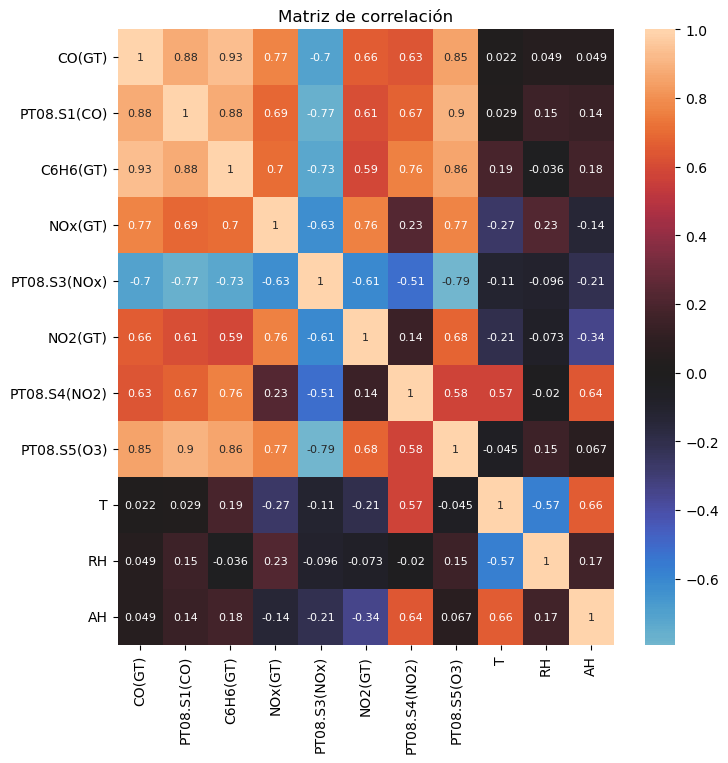

In [53]:
plt.figure(figsize=(8,8))
sns.heatmap(calidad_aire_num.corr(), annot=True, annot_kws={"size": 8}, center=0)
plt.title("Matriz de correlación")
plt.show()

Se puede notar que existe una correlación muy fuerte de 0.98 entre los features "PT08.S2(NMHC)" y "C6H6(GT)", lo cual agrega redundancia a los datos y se podría eliminar para una mejor eficiencia y uso de los recursos.

In [50]:
calidad_aire_preprocesado.drop('PT08.S2(NMHC)', axis=1, inplace=True)

array([[<Axes: title={'center': 'CO(GT)'}>,
        <Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>,
        <Axes: title={'center': 'NO2(GT)'}>],
       [<Axes: title={'center': 'PT08.S4(NO2)'}>,
        <Axes: title={'center': 'PT08.S5(O3)'}>,
        <Axes: title={'center': 'T'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'AH'}>,
        <Axes: >]], dtype=object)

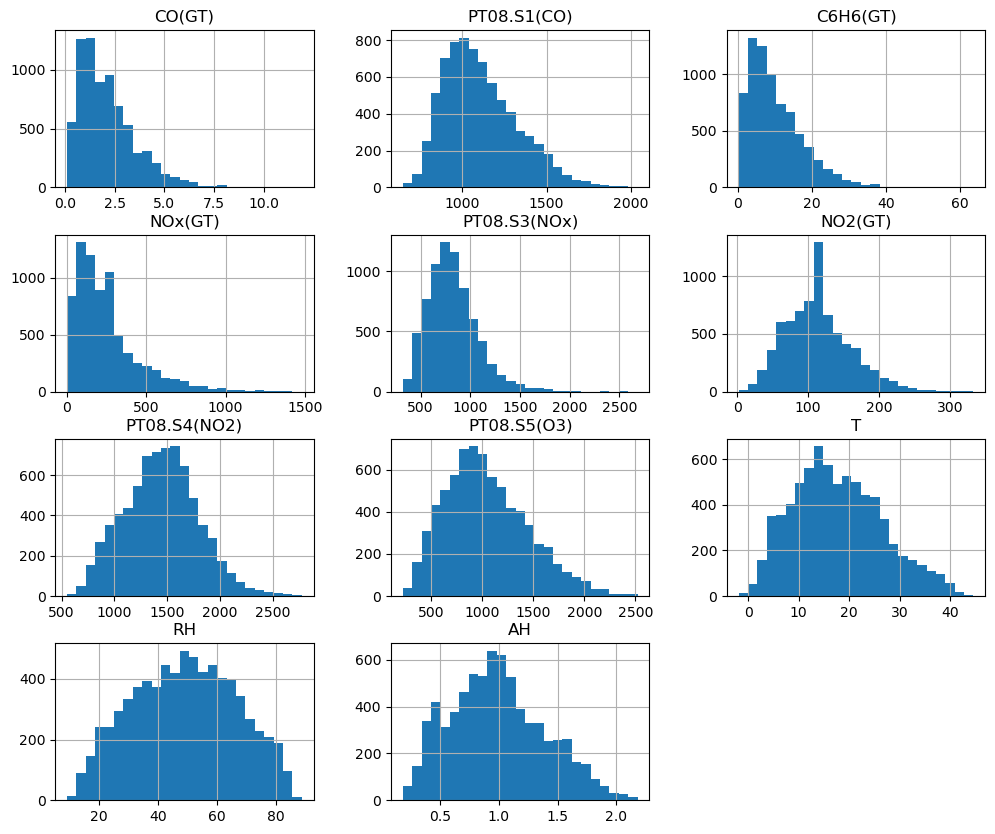

In [56]:
calidad_aire_preprocesado.hist(bins=25, figsize=(12, 10))

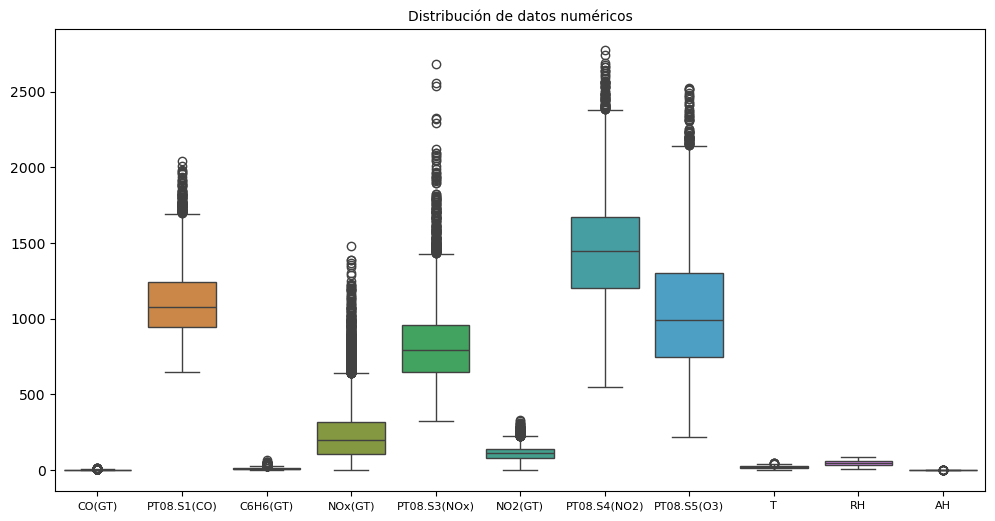

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(calidad_aire_num)
plt.title("Distribución de datos numéricos", fontsize=10)
plt.xticks(fontsize=8)
plt.show()

NameError: name 'calidad_aire_preprocesado' is not defined

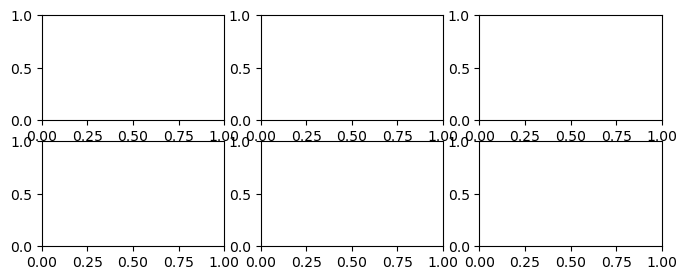

In [23]:
columnas_a_transformar_sqrt = ["PT08.S1(CO)","NOx(GT)", "PT08.S3(NOx)","PT08.S4(NO2)", "PT08.S5(O3)"]

for columna in columnas_a_transformar_sqrt:
    fig, axs = plt.subplots(3, 2, figsize=(8, 3))
    
    calidad_aire_preprocesado[columna].hist(ax=axs[0], bins=50)
    calidad_aire_preprocesado[columna].apply(np.sqrt).hist(ax=axs[1], bins=50)
    
    axs[0].set_xlabel(columna)
    axs[1].set_xlabel(f"Log de {columna}")
    axs[0].set_ylabel("Número de mediciones")
    
    plt.suptitle(f"Raíz de {columna}")
    plt.tight_layout()
    plt.show()

## Moda

In [3]:
moda = pd.read_csv('Moda/Train.csv')

In [4]:
moda.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
moda_labels = moda.label
moda.drop("label", axis=1, inplace=True)

In [18]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.figure(figsize=(4,4))
    plt.imshow(image, cmap="binary")
    plt.axis("off")

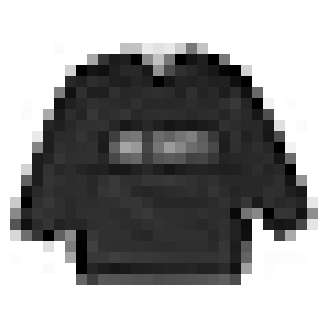

In [46]:
some_digit = moda.iloc[0].values
plot_digit(some_digit)
plt.show()

Se puede notar que en todas las imagenes existen pixeles en blanco en las orillas que no aportan información. Se procede a recortar las imágenes donde el tamaño será de la imagen más larga.

## Ingresos Anuales

In [6]:
ingresos = pd.read_excel('IngresosPromedioAnual.xlsx')

In [7]:
ingresos.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<ol>
    <li>age: the age of an individual</li>
    <li>workclass: a general term to represent the employment status of an individual</li>
    <li>fnlwgt: final weight. This is the number of people the census believes the entry represents..</li>
    <li>education: the highest level of education achieved by an individual.</li>
    <li>education­num: the highest level of education achieved in numerical form.</li>
    <li>marital­status: marital status of an individual.</li>
    <li>occupation: the general type of occupation of an individual</li>
    <li>relationship: represents what this individual is relative to others.</li>
    <li>race: Descriptions of an individual’s race</li>
    <li>sex: the sex of the individual</li>
    <li>capital­gain: capital gains for an individual</li>
    <li>capital­loss: capital loss for an individual</li>
    <li>hours­per­week: the hours an individual has reported to work per week</li>
    <li>native­country: country of origin for an individual</li>
</ol>


In [8]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
ingresos_preprocesado = ingresos.drop('education', axis=1)

In [10]:
ingresos_preprocesado["income"] = ingresos_preprocesado["income"].map({"<=50K": 0, ">50K": 1})

In [11]:
del ingresos

In [12]:
ingresos_cat = ingresos_preprocesado.select_dtypes(include=[object])
print("Número de clases por columna:")
for column in ingresos_cat.columns:
    print(f'\t{column}: {ingresos_cat[column].nunique()}')

Número de clases por columna:
	workclass: 9
	marital.status: 7
	occupation: 15
	relationship: 6
	race: 5
	sex: 2
	native.country: 42


In [13]:
for column in ingresos_cat.columns:
    print(f'{column}: {ingresos_cat[ingresos_cat[column] == "?"][column].count()}')

workclass: 1836
marital.status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
native.country: 583


In [14]:
print(f"Porcentaje de instancias de '?' en workclass: {((ingresos_cat['workclass'] == '?').sum() / len(ingresos_cat))*100:.2f}%")
print(f"Porcentaje de instancias de '?' en workclass: {((ingresos_cat['occupation'] == '?').sum() / len(ingresos_cat))*100:.2f}%")

Porcentaje de instancias de '?' en workclass: 5.64%
Porcentaje de instancias de '?' en workclass: 5.66%


Porque la codificación de países incrementaría mucho la dimensionalidad del conjunto de datos entonces se opta por reemplazar la categoría del país con el Producto Interno Bruto per Capita. El sexo se cambia a 0 y 1 ya que solo hay 2 clases.

La cantidad de instancias que tienen '?' como clase es significante por lo que decide no eliminarse las filas con ese valor ya que pueden significar desempleo y podrían ayudar al modelo.

In [15]:
ingresos_cat.drop(['sex', 'native.country'], axis=1, inplace=True)

In [16]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
ingresos_cat_codificado = encoder.fit_transform(ingresos_cat)

In [37]:
ingresos_cat = pd.DataFrame(
    ingresos_cat_codificado, 
    columns=encoder.get_feature_names_out(ingresos_cat.columns),
    index=ingresos_cat.index
)

In [17]:
ingresos_preprocesado['sex'] = ingresos_preprocesado['sex'].map({"Male": 0, "Female": 1})

### Codificación de Países

In [18]:
gdp_per_capita = pd.read_csv('gdp-per-capita.csv')
gdp_1994 = gdp_per_capita[['Country', '1994']]
del gdp_per_capita

In [19]:
gdp_1994[gdp_1994.isnull().any(axis=1)]

,Country,1994
47,Czechoslovakia (Former),NaN
59,Ethiopia (Former),NaN
178,USSR (Former),NaN
182,Yemen Arab Republic (Former),NaN
183,Yemen Democratic (Former),NaN
184,Yugoslavia (Former),NaN


In [20]:
lista_paises_con_gdp = gdp_1994.Country.unique()
for i in ingresos_preprocesado['native.country'].unique():
    if i not in lista_paises_con_gdp:
        print(i)

United-States
?
Vietnam
Taiwan
Trinadad&Tobago
South
Holand-Netherlands
Puerto-Rico
Iran
England
Hong
Dominican-Republic
El-Salvador
Columbia
Yugoslavia
Scotland
Laos
Outlying-US(Guam-USVI-etc)


In [21]:
gdp_1994.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Aruba',
       'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Cuba', 'Cyprus', 'Czechoslovakia (Former)',
       'D.P.R. of Korea', 'D.R. of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eswatini',
       'Ethiopia (Former)', 'Fiji', 'Finland',
       'Former Nethe

In [22]:
ingresos_preprocesado[ingresos_preprocesado['native.country'] == 'Outlying-US(Guam-USVI-etc)']['native.country'].count()

np.int64(14)

In [23]:
reemplazos = {
    'Puerto-Rico': 'Puerto Rico',
    'United-States': 'United States',
    'Trinadad&Tobago': 'Trinidad and Tobago',
    'Dominican-Republic': 'Dominican Republic',
    'Holand-Netherlands': 'Netherlands',
    'El-Salvador': 'El Salvador',
    'Columbia': 'Colombia',
    'Outlying-US(Guam-USVI-etc)': 'Puerto Rico',
    'Vietnam': 'Viet Nam',
    'Laos': "Lao People's DR",
    'Hong': 'China, Hong Kong SAR',
    'Iran': 'Iran (Islamic Republic of)',
    'South': 'South Africa',
    'England': 'United Kingdom',
    'Scotland': 'United Kingdom'
}
ingresos_preprocesado['native.country'] = ingresos_preprocesado['native.country'].replace(reemplazos)
del reemplazos

In [24]:
ingresos_preprocesado = ingresos_preprocesado[ingresos_preprocesado['native.country'] != 'Yugoslavia']
ingresos_preprocesado = ingresos_preprocesado[ingresos_preprocesado['native.country'] != '?']

In [25]:
ingresos_preprocesado = ingresos_preprocesado.merge(gdp_1994, left_on='native.country', right_on='Country', how='left')
ingresos_preprocesado = ingresos_preprocesado.drop(['native.country', 'Country'], axis=1)
ingresos_preprocesado = ingresos_preprocesado.rename(columns={'1994': 'country'})

In [26]:
ingresos_preprocesado['country'] = ingresos_preprocesado['country'].fillna(12220)

### Codificación de Categorías

In [18]:
ingresos_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             31962 non-null  int64  
 1   workclass       31962 non-null  object 
 2   fnlwgt          31962 non-null  int64  
 3   education.num   31962 non-null  int64  
 4   marital.status  31962 non-null  object 
 5   occupation      31962 non-null  object 
 6   relationship    31962 non-null  object 
 7   race            31962 non-null  object 
 8   sex             31962 non-null  int64  
 9   capital.gain    31962 non-null  int64  
 10  capital.loss    31962 non-null  int64  
 11  hours.per.week  31962 non-null  int64  
 12  country         31962 non-null  float64
dtypes: float64(1), int64(7), object(5)
memory usage: 3.2+ MB


In [19]:
ingresos_preprocesado.describe(include='all')

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,country
count,31962.000000,31962,3.196200e+04,31962.000000,31962,31962,31962,31962,31962.000000,31962.000000,31962.000000,31962.000000,31962.000000
unique,NaN,9,NaN,NaN,7,15,6,5,NaN,NaN,NaN,NaN,NaN
top,NaN,Private,NaN,NaN,Married-civ-spouse,Prof-specialty,Husband,White,NaN,NaN,NaN,NaN,NaN
freq,NaN,22273,NaN,NaN,14680,4038,12936,27414,NaN,NaN,NaN,NaN,NaN
mean,38.578906,NaN,1.897010e+05,10.071303,NaN,NaN,NaN,NaN,0.331800,1064.719605,86.782773,40.415775,26060.258468
std,13.662734,NaN,1.057223e+05,2.560543,NaN,NaN,NaN,NaN,0.470867,7300.343262,401.690119,12.345477,6182.589596
min,17.000000,NaN,1.228500e+04,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,224.564642
25%,28.000000,NaN,1.176180e+05,9.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,40.000000,27784.863996
50%,37.000000,NaN,1.783105e+05,10.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,40.000000,27784.863996
75%,48.000000,NaN,2.373790e+05,12.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,45.000000,27784.863996


### Feature Engineering

In [28]:
ingresos_preprocesado[ingresos_preprocesado['capital.gain'] == 0]['capital.loss'].count()

np.int64(29305)

In [29]:
ingresos_preprocesado['has_capital_gain'] = (ingresos_preprocesado['capital.gain'] > 0).astype(int)
ingresos_preprocesado['has_capital_loss'] = (ingresos_preprocesado['capital.loss'] > 0).astype(int)

In [30]:
ingresos_preprocesado['net_capital'] =ingresos_preprocesado['capital.gain'] - ingresos_preprocesado['capital.loss']

In [31]:
ingresos_preprocesado.drop(['capital.gain', 'capital.loss'], axis=1, inplace=True)

In [32]:
ingresos_num = ingresos_preprocesado.select_dtypes(include=[np.number])
ingresos_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               31962 non-null  int64  
 1   fnlwgt            31962 non-null  int64  
 2   education.num     31962 non-null  int64  
 3   sex               31962 non-null  int64  
 4   hours.per.week    31962 non-null  int64  
 5   income            31962 non-null  int64  
 6   country           31962 non-null  float64
 7   has_capital_gain  31962 non-null  int64  
 8   has_capital_loss  31962 non-null  int64  
 9   net_capital       31962 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.4 MB


In [33]:
del ingresos_preprocesado

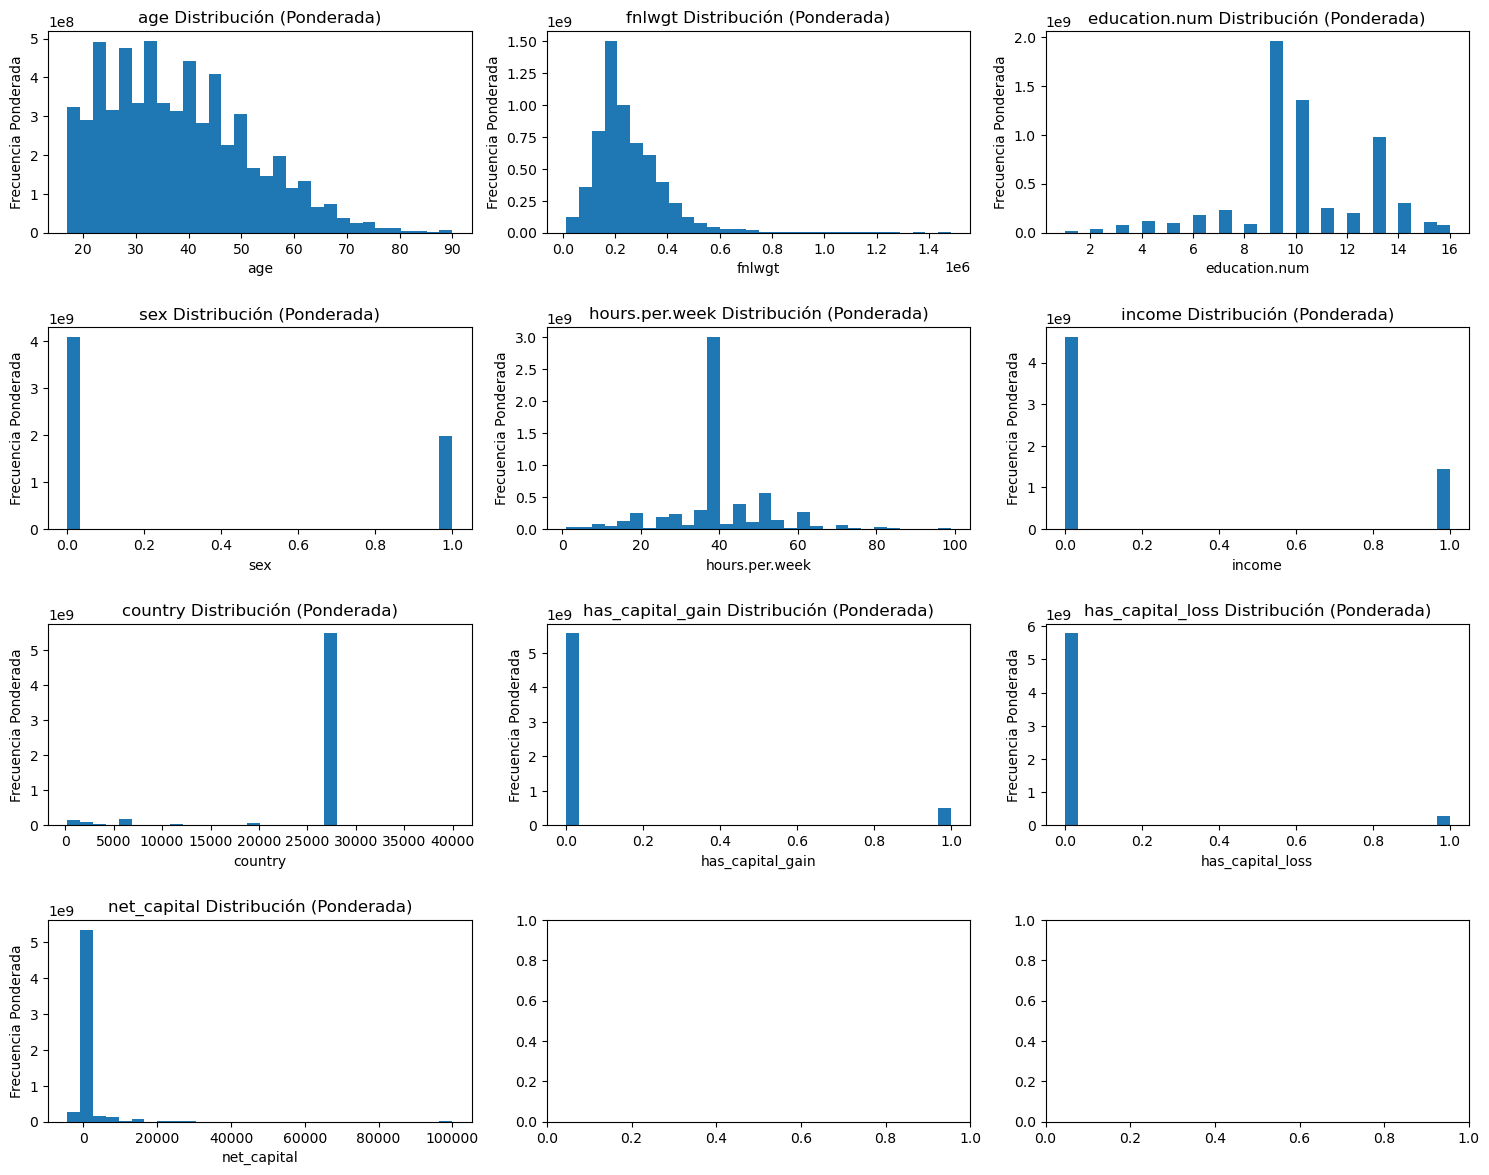

In [41]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(ingresos_num.columns):
    axes[i].hist(ingresos_num[col], weights=ingresos_num['fnlwgt'], bins=30)
    axes[i].set_title(f'{col} Distribución (Ponderada)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia Ponderada')

plt.tight_layout()
plt.show()

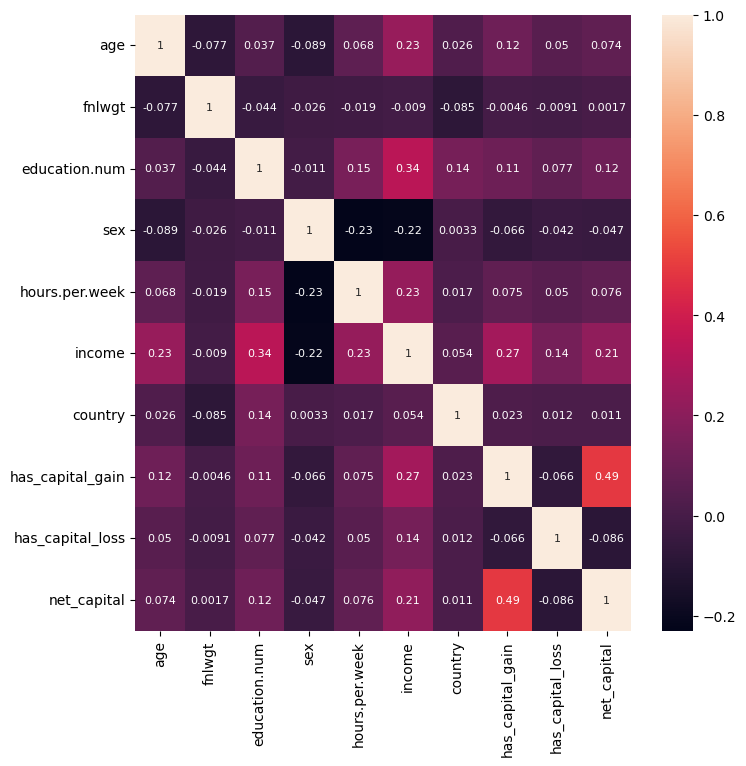

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(ingresos_num.corr(), annot=True, annot_kws={"size": 8})
plt.show()

In [43]:
ingresos_preprocesado = pd.concat([ingresos_num, ingresos_cat], axis=1)
del ingresos_num
del ingresos_cat

# Entrenamiento

## Regresión Lineal

In [ ]:
def compute_mse(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    mse = (1/m) * np.sum((y_pred - y)**2)
    return mse

In [ ]:
#Implementación del Decenso Gradiente
def train(X, y, X_valid, y_valid, alpha=0.0001, n_iter=1000):
    train_mse_history = []
    valid_mse_history = []
    
    n_features = X.shape[1]
    m = X.shape[0]
    theta = np.zeros((n_features, 1)) # Inicialización de pesos

    for i in range(n_iter):
        y_pred = X.dot(theta)# Predicciones
        y_pred_valid = X_valid.dot(theta)
        
        grad = (2/m) * X.T.dot(y_pred - y)# Gradiente
        theta = theta - alpha * grad# Actualizar pesos
        
        train_mse = compute_mse(X, y, theta)# Guardar MSE
        valid_mse = compute_mse(X_valid, y_valid, theta)
        train_mse_history.append(train_mse)
        valid_mse_history.append(valid_mse)
        
        # Imprimir cada 100 iteraciones
        if i % 100 == 0:
            print(f"Iteración {i}, MSE Entrenamiento: {train_mse:.4f}")
            print(f"Iteración {i}, MSE Validación: {valid_mse:.4f}")

    return theta, train_mse_history, valid_mse_history

## Random Forest

## Regresión Logística

## Árboles de Decisión

## K-Nearest Neighbors